In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
def matriz_householder(v):
    #Gera a matriz de refleccao para o vetor v
    tam_v = v.shape[0]
        
    e1 = np.eye(tam_v)[0]                        #Primeira coluna da identidade                    
    vetor = np.linalg.norm(v) * e1               #Vetor [||v||,0....]
    
    if v[0] < 0:                                 #Se o primeiro elemento for < 0,troca o sinal
        vetor = - vetor
    u = v + vetor
    
    H = np.eye(tam_v) -  ((2 * np.outer(u,u)) / np.dot(u,np.transpose(u)))      #Gera H
    
    return H

In [7]:
def QR_householder(A):
    m,n = A.shape                                 
    Q = np.eye(m)
    R = A
    menor_dim = min(m,n)

    for i in range(menor_dim):
        v = R[i:, i]                               #linha it pra frente e coluna it
        Hh = matriz_householder(v)                 #Recebe a matriz de refleccao para o vetor v

        H = np.eye(m)                              #Identidade
        H[i:, i:] = Hh                             #Preenche com a matriz de refleccao as linhas e colunas i pra frente

        R = np.dot(H, R)                           #Gera R
        Q = np.dot(Q, H)                           #Gera Q
        
    return Q,R

A= [[2 0 2 2 3]
 [0 1 1 3 2]
 [4 4 0 4 0]
 [4 4 2 3 2]
 [2 4 0 4 4]
 [4 0 1 3 4]
 [2 0 1 0 3]] 

Matriz R [[-7.74597 -5.16398 -2.32379 -6.71317 -5.68038]
 [-0.      -4.72582  0.63481 -2.60978  0.70535]
 [-0.      -0.       2.2797   0.90219  2.34779]
 [-0.      -0.      -0.       3.21068  2.36377]
 [ 0.      -0.      -0.      -0.      -3.75983]
 [ 0.      -0.      -0.      -0.       0.     ]
 [ 0.      -0.      -0.       0.       0.     ]] 

Matriz Q [[-0.2582   0.28214  0.53555  0.1619   0.08132 -0.67643 -0.27664]
 [ 0.      -0.2116   0.49758  0.62256  0.13047  0.27547  0.4766 ]
 [-0.5164  -0.28214 -0.44782  0.06261  0.48698 -0.3321   0.31911]
 [-0.5164  -0.28214  0.42949 -0.49537  0.15207  0.40096 -0.19996]
 [-0.2582  -0.56428 -0.10606  0.27711 -0.67166 -0.13774 -0.2383 ]
 [-0.5164   0.56428 -0.24486  0.38213 -0.0905   0.40096 -0.19996]
 [-0.2582   0.28214  0.0969  -0.33776 -0.50673 -0.12549  0.67656]] 

Inversa de Q [[-0.25819 -0.      -0.51639 -0.51639 -0.2582  -0.5164  -0.2582 ]
 [

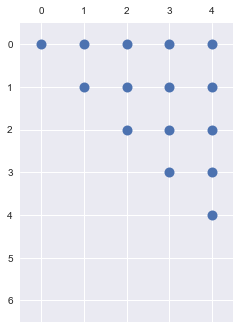

In [8]:
m,n = 7,5
A = np.random.randint(0,5,(m,n))
print('A=',A,'\n')

Q,R = QR_householder(A)
R = np.around(R, decimals=5)                   #Arredonda R
Q = np.around(Q, decimals=5)                   #Arredonda Q
QxR = np.dot(Q,R)
invQ = np.around(np.linalg.inv(Q),decimals=5)

print('Matriz R',R,'\n')
print('Matriz Q',Q,'\n')
print('Inversa de Q', invQ,'\n')               #Qt = Q-1
print('Q x R=',np.around(QxR),'\n')            #A = QR
plt.spy(R,marker='o')                           #Plota aonde tem número !=0 na matriz R(triang. superior)